In [1]:
import pandas as pd
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

# load dataset
df = pd.read_csv('data/game_sales_2016.csv')

#load dataset in cle

# split dataset to not touch first 1000 entries
df1 = df.head(1000)
df2 = df.tail(15719)

# drop all rows in the lower sub dataset, that have no scores at all
columns_to_check = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', ]
df2.dropna(subset=columns_to_check, how='all', inplace=True)

# combine first 1000 and cleaned lower sub dataset
df = pd.concat([df1, df2])

# reset the index of combined datasets
df = df.reset_index(drop=True)
# rename columns
df.columns = df.columns.map(lambda col: col.lower().strip())
df.columns = df.columns.map(lambda col: col.replace(" ", "_"))
df.loc[df['user_score']=='tbd', 'user_score'] = None
df['user_score'] = df['user_score'].astype(float)

df.loc[df['year_of_release']==None, 'year_of_release'] = 0
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df['year_of_release'] = df['year_of_release'].astype(int)



In [3]:
#generate a .csv with all the uique publishers in it

df["publisher"].unique()
publisher_df=pd.DataFrame({"publisher":df["publisher"].unique()})
publisher_df.to_csv("data/publishers.csv")

In [4]:
#generate the same for platforms
df["platform"].unique()
platform_df=pd.DataFrame({"platform":df["platform"].unique()})
platform_df.to_csv("data/platforms.csv")


In [5]:
# same for developer
developer_df=pd.DataFrame({"developer":df['developer'].unique()})
developer_df.to_csv("data/developer.csv")

In [6]:
#same for genres
genres_df=pd.DataFrame({"genre":df['genre'].unique()})
genres_df.to_csv("data/genre.csv")

In [7]:
#same for ratings
df_rating=pd.DataFrame({"rating":df['rating'].unique()})
df_rating.to_csv("data/rating.csv")

In [8]:
#replace ratings with indexes
rating_dict = df_rating.reset_index().set_index('rating')['index'].to_dict()
df['rating'] = df['rating'].map(rating_dict)

In [9]:
# same for genres
genre_dict = genres_df.reset_index().set_index('genre')['index'].to_dict()
df['genre'] = df['genre'].map(genre_dict)


In [10]:
developer_dict = developer_df.reset_index().set_index('developer')['index'].to_dict()
df['developer'] = df['developer'].map(developer_dict)


In [11]:
platform_dict = platform_df.reset_index().set_index('platform')['index'].to_dict() # Changed 'platform' to 'platforms'
df['platform'] = df['platform'].map(platform_dict)

In [12]:
publisher_dict = publisher_df.reset_index().set_index('publisher')['index'].to_dict()  # using 'publisher' as column name
df['publisher'] = df['publisher'].map(publisher_dict)

In [13]:
df.to_csv("data/game_data_replaced_with_indexes.csv")

In [14]:
df_filled=df.fillna(0)

In [15]:
df_filled.to_csv("data/game_data_filled.csv")

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Global Sales')

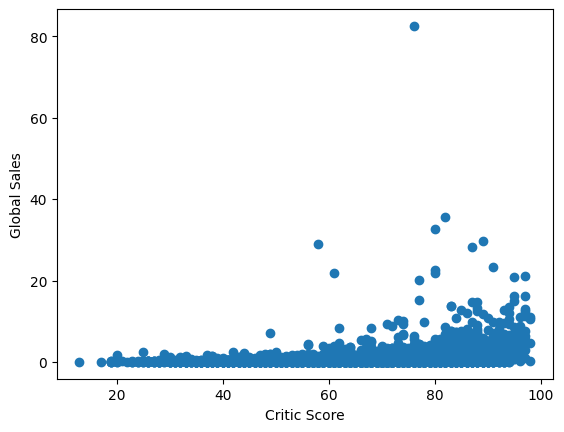

In [43]:
df_criticscore=pd.read_csv("data/criticscore_sales.csv")
plt.scatter(df_criticscore["critic_score"],df_criticscore["global_sales"])
plt.xlabel("Critic Score")
plt.ylabel("Global Sales")
#df_criticscore

Text(0, 0.5, 'Global Sales')

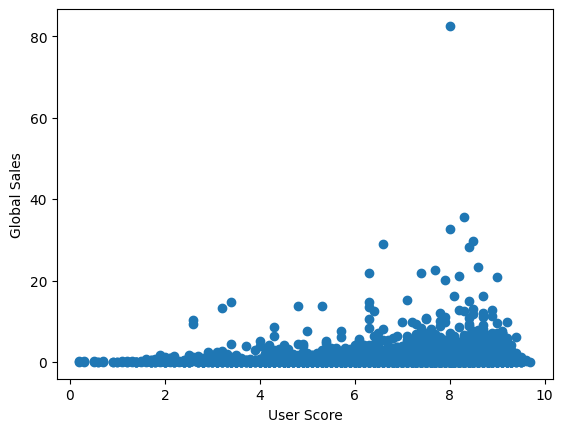

In [42]:

df_userscore=pd.read_csv("data/userscore_sales.csv")
plt.scatter(df_userscore["user_score"], df_userscore["global_sales"])
plt.xlabel("User Score")
plt.ylabel("Global Sales")